## Lobes continuum plots


In [31]:
import os, sys, string, shutil
import numpy as np
from astropy.io import ascii, fits

import aplpy

from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, LogLocator
from matplotlib import transforms as mtransforms
from matplotlib.ticker import LogFormatter 
import pyregion
    

FA_radeg = 50.673825
FA_decdeg = -37.208227
BeamRa = 50.691035
BeamDec = -37.218974

#rootDir = '/home/maccagni/Projects/MFS/FornaxA/contData/'
rootDir = '/Users/maccagni/Projects/MFS/FornaxA/contData/'


imDir = rootDir+'inIms/'

figDir = rootDir+'contFigs/'
get_ipython().magic(u'pylab inline')

print '''\t+---------+\n\t Inputs loaded\n\t+---------+'''


Populating the interactive namespace from numpy and matplotlib
	+---------+
	 Inputs loaded
	+---------+


/Users/maccagni/programs/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'rc', 'e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [30]:
#-------------------------------------------------#
# SRT
#-------------------------------------------------#

srtdir = imDir
freqs = ['5700MHz',
         '5900MHz',
         '6100MHz',
         '6300MHz',
         '6500MHz',
         '6700MHz',
         '6874MHz',
         ]
filenames_srt = []
for i in xrange(0,len(freqs)):
    name_tmp = srtdir+'SRT_'+freqs[i]+'.fits'
    filenames_srt.append(name_tmp)      
    
print '''\\t+---------+\\n\\t SRT Names loaded\\n\\t+---------+'''

\t+---------+\n\t SRT Names loaded\n\t+---------+


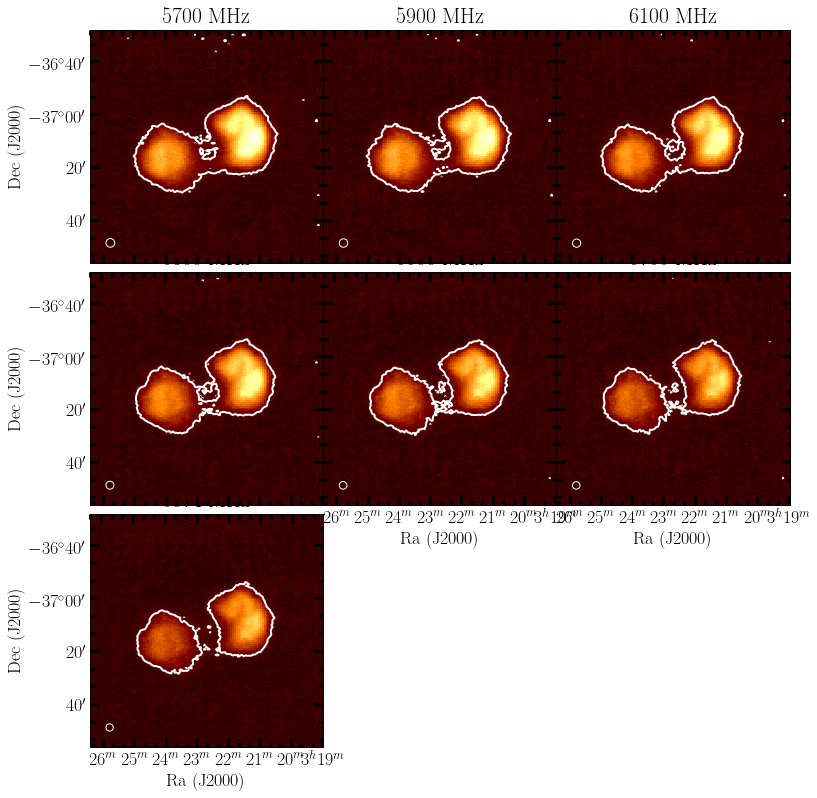

In [26]:
#-------------------------------#
# SRT                           #
#-------------------------------#

# initialize plotting parameters

#vladir = rootDir+'/VLA/'
#filename_vla = vladir+'FornaxA_307-333MHz.fits'

params = {'font.family'         :' serif',
          'font.style'          : 'normal',
          'font.weight'         : 'book',
          'font.size'           : 18.0,
          'axes.linewidth'      : 2,
          'lines.linewidth'     : 2,
          'xtick.labelsize'     : 22,
          'ytick.labelsize'     : 22, 
          'xtick.direction'     :'in',
          'ytick.direction'     :'in',
          'xtick.major.size'    : 9,
          'xtick.major.width'   : 2,
          'xtick.minor.size'    : 6,
          'xtick.minor.width'   : 2,
          'ytick.major.size'    : 9,
          'ytick.major.width'   : 2,
          'ytick.minor.size'    : 6,
          'ytick.minor.width'   : 2, 
          'text.usetex'         : True,
          'text.latex.unicode'  : True
           }
plt.rcParams.update(params)

#plot image
a=filenames_srt[0]
b=filenames_srt[1]
c=filenames_srt[2]
d=filenames_srt[3]
e=filenames_srt[4]
f=filenames_srt[5]
g=filenames_srt[6]

fig = plt.figure(figsize=(12, 12))

f1 = aplpy.FITSFigure(g, figure=fig, subplot=[0.1,0.1,0.27,0.27])
f1.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'linear',
                   exponent=1.,vmin=-0.16,vmax=1.3)
f1.recenter(FA_radeg,FA_decdeg,width=1.47,height=1.47)
f1.show_contour(g,levels=[0.1], colors='white',lw=2)
f1.add_beam()
f1.beam.show()
f1.beam.set_corner('bottom left')
f1.beam.set(edgecolor = 'white', facecolor = 'None', linewidth=1)

f1.set_title('6874 MHz')

#f1.show_colorbar()
#f1.colorbar.hide()
f1.axis_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal')
f1.axis_labels.set_xtext('Ra (J2000)')
f1.axis_labels.set_ytext('Dec (J2000)')
f1.tick_labels.set_xformat('hh:mm')
f1.tick_labels.set_yformat('dd:mm')
f1.tick_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal') 
f1.ticks.set_color('k')
f1.ticks.set_length(9)  # points
f1.ticks.set_linewidth(3)  # points
f1.ticks.set_minor_frequency(3)
f1.ticks.show()

f2 = aplpy.FITSFigure(f, figure=fig, subplot=[0.64,0.38,0.27,0.27])
f2.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'linear',
                    exponent=1.,vmin=-0.16,vmax=1.3)
f2.recenter(FA_radeg,FA_decdeg,width=1.47,height=1.47)
f2.show_contour(f,levels=[0.1], colors='white',lw=2)

f2.add_beam()
f2.beam.show()
f2.beam.set_corner('bottom left')
f2.beam.set(edgecolor = 'white', facecolor = 'None', linewidth=1)

f2.set_title('6700 MHz')

#f2.show_colorbar()
#f2.colorbar.set_box([0.905, 0.08, 0.015, 0.87], box_orientation='vertical')
#f2.colorbar.set_frame_linewidth(1)
#f2.colorbar.set_pad(0.2)
#f2.colorbar.set_font( weight='book', 
#                      stretch='normal', family='serif', 
#                      style='normal', variant='normal')
#f2.colorbar.set_axis_label_text(r'Jy beam$^{-1}$')

f2.tick_labels.set_xformat('hh:mm')
f2.axis_labels.set_xtext('Ra (J2000)')
f2.axis_labels.hide_y()
f2.tick_labels.hide_y()

f2.tick_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal') 
f2.ticks.set_color('k')
f2.ticks.set_length(9)  # points
f2.ticks.set_linewidth(3)  # points
f2.ticks.set_minor_frequency(3)
f2.ticks.show()


f3 = aplpy.FITSFigure(e, figure=fig, subplot=[0.37,0.38,0.27,0.27])
f3.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'linear',
                    exponent=1.,vmin=-0.16,vmax=1.3)
f3.recenter(FA_radeg,FA_decdeg,width=1.47,height=1.47)
f3.show_contour(e,levels=[0.1], colors='white',lw=2)

f3.set_title('6500 MHz')

#f3.show_colorbar()
#f3.colorbar.hide()

f3.add_beam()
f3.beam.show()
f3.beam.set_corner('bottom left')
f3.beam.set(edgecolor = 'white', facecolor = 'None', linewidth=1)

f3.axis_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal')
f3.axis_labels.set_xtext('Ra (J2000)')
f3.axis_labels.hide_y()
f3.tick_labels.hide_y()
f3.tick_labels.set_xformat('hh:mm')
f3.tick_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal') 
f3.ticks.set_color('k')
f3.ticks.set_length(9)  # points
f3.ticks.set_linewidth(3)  # points
f3.ticks.set_minor_frequency(3)
f3.ticks.show()

f4 = aplpy.FITSFigure(d, figure=fig, subplot=[0.1,0.38,0.27,0.27])
f4.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'linear',
                    exponent=1.,vmin=-0.16,vmax=1.3)
f4.recenter(FA_radeg,FA_decdeg,width=1.47,height=1.47)
f4.show_contour(d,levels=[0.1], colors='white',lw=2)

f4.set_title('6300 MHz')

#f4.show_colorbar()
#f4.colorbar.hide()

f4.add_beam()
f4.beam.show()
f4.beam.set_corner('bottom left')
f4.beam.set(edgecolor = 'white', facecolor = 'None', linewidth=1)

f4.axis_labels.set_ytext('Dec (J2000)')
f4.axis_labels.hide_x()
f4.tick_labels.hide_x()
f4.tick_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal') 
f4.tick_labels.set_yformat('dd:mm')
f4.ticks.set_color('k')
f4.ticks.set_length(9)  # points
f4.ticks.set_linewidth(3)  # points
f4.ticks.set_minor_frequency(3)
f4.ticks.show()

f5 = aplpy.FITSFigure(c, figure=fig, subplot=[0.64,0.66,0.27,0.27])
f5.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'linear',
                    exponent=1.,vmin=-0.16,vmax=1.3)
f5.recenter(FA_radeg,FA_decdeg,width=1.47,height=1.47)

f5.show_contour(c,levels=[0.1], colors='white',lw=2)

f5.set_title('6100 MHz')

f5.add_beam()
f5.beam.show()
f5.beam.set_corner('bottom left')
f5.beam.set(edgecolor = 'white', facecolor = 'None', linewidth=1)


#f5.show_colorbar()
#f5.colorbar.hide()

f5.ticks.set_color('k')
f5.ticks.set_length(9)  # points
f5.ticks.set_linewidth(3)  # points
f5.ticks.set_minor_frequency(3)
f5.tick_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal') 
f5.tick_labels.set_yformat('dd:mm')
f5.tick_labels.set_xformat('hh:mm')
f5.axis_labels.hide_y()
f5.tick_labels.hide_y()
f5.axis_labels.hide_x()
f5.tick_labels.hide_x()
f5.ticks.show()


f6 = aplpy.FITSFigure(b, figure=fig, subplot=[0.37,0.66,0.27,0.27])
f6.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'linear',
                    exponent=1.,vmin=-0.16,vmax=1.3)
f6.recenter(FA_radeg,FA_decdeg,width=1.47,height=1.47)
f6.show_contour(b,levels=[0.1], colors='white',lw=2)

f6.set_title('5900 MHz')
f6.add_beam()
f6.beam.show()
f6.beam.set_corner('bottom left')
f6.beam.set(edgecolor = 'white', facecolor = 'None', linewidth=1)

#f6.show_colorbar()
#f6.colorbar.hide()

f6.axis_labels.hide_x()
f6.axis_labels.hide_y()
f6.tick_labels.hide_x()
f6.tick_labels.hide_y()

f6.tick_labels.set_font( weight='book',
                         stretch='normal', family='serif',
                         style='normal', variant='normal') 

f6.ticks.set_color('k')
f6.ticks.set_length(9)  # points
f6.ticks.set_linewidth(3)  # points
f6.ticks.set_minor_frequency(3)
f6.ticks.show()


f7 = aplpy.FITSFigure(a, figure=fig, subplot=[0.1,0.66,0.27,0.27])
f7.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'linear',
                   exponent=1.,vmin=-0.16,vmax=1.3)
f7.recenter(FA_radeg,FA_decdeg,width=1.47,height=1.47)

f7.add_beam()
f7.beam.show()
f7.beam.set_corner('bottom left')
f7.beam.set(edgecolor = 'white', facecolor = 'None', linewidth=1)
f7.set_title('5700 MHz')#

f7.show_contour(a,levels=[0.1], colors='white',linewidth=2)

f7.axis_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal')

f7.axis_labels.set_ytext('Dec (J2000)')
f7.axis_labels.hide_x()
f7.tick_labels.hide_x()
f7.tick_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal') 
f7.tick_labels.set_yformat('dd:mm')

f7.ticks.set_color('k')
f7.ticks.set_length(9)  # points
f7.ticks.set_linewidth(3)  # points
f7.ticks.set_minor_frequency(3)
f7.ticks.show()

#f7.show_regions(rootDir+'regions/Fa_ll.reg')
#f7.show_regions(rootDir+'regions/Fa_rr.reg')
#f7.show_regions(rootDir+'regions/Fa_planck.reg')
#f7.show_regions(rootDir+'/regions/Fa_co.reg')

fig.savefig(figDir+'SRT_continuum_images.pdf',format='png',overwrite=True)

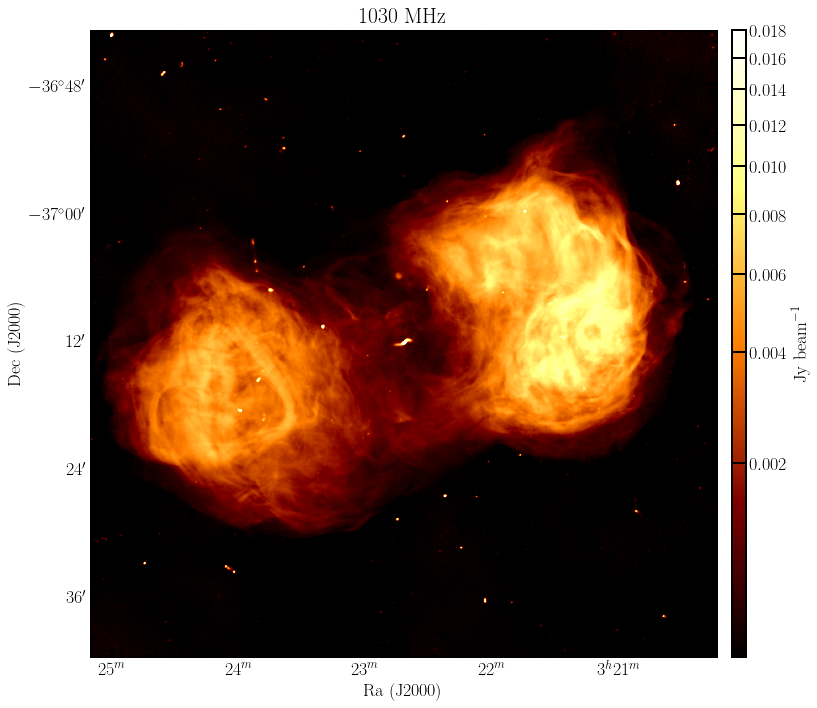

In [78]:
#-------------------------------#
# MeerKAT                       #
#-------------------------------#
import fluxInt
fint = fluxInt.flInt()
fint.rootdir = rootDir

a=imDir+'Meer_1030MHz.fits'
b=imDir+'Meer_1030MHz_plot.fits'

datas,heads = fint.openFile(a)
fits.writeto(b,datas,heads,overwrite=True)
# initialize plotting parameters

#vladir = rootDir+'/VLA/'
#filename_vla = vladir+'FornaxA_307-333MHz.fits'

params = {'font.family'         :' serif',
          'font.style'          : 'normal',
          'font.weight'         : 'book',
          'font.size'           : 18.0,
          'axes.linewidth'      : 2,
          'lines.linewidth'     : 2,
          'xtick.labelsize'     : 22,
          'ytick.labelsize'     : 22, 
          'xtick.direction'     :'in',
          'ytick.direction'     :'in',
          'xtick.major.size'    : 9,
          'xtick.major.width'   : 2,
          'xtick.minor.size'    : 6,
          'xtick.minor.width'   : 2,
          'ytick.major.size'    : 9,
          'ytick.major.width'   : 2,
          'ytick.minor.size'    : 6,
          'ytick.minor.width'   : 2, 
          'text.usetex'         : True,
          'text.latex.unicode'  : True
           }
plt.rcParams.update(params)

#plot image
#a=imDir+'Meer_1030MHz.fits'


fig = plt.figure(figsize=(12, 12))

f1 = aplpy.FITSFigure(b, figure=fig)
f1.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'log',exponent=4,vmin=1e-5,vmid=-1.8e-3,vmax=1.8e-2)
f1.recenter(FA_radeg,FA_decdeg,width=0.98,height=0.98)
#f1.show_contour(b,levels=[0.1], colors='white',lw=2)
f1.add_beam()
f1.beam.show()
f1.beam.set_corner('bottom left')
f1.beam.set(edgecolor = 'black', facecolor = 'None', linewidth=1)

f1.set_title('1030 MHz')

f1.show_colorbar()
#f1.colorbar.set_box([0.905, 0.08, 0.015, 0.87], box_orientation='vertical')
f1.colorbar.set_frame_linewidth(1)
f1.colorbar.set_pad(0.2)
f1.colorbar.set_font( weight='book', 
                      stretch='normal', family='serif', 
                      style='normal', variant='normal')
f1.colorbar.set_axis_label_text(r'Jy beam$^{-1}$')
#f1.show_colorbar()
#f1.colorbar.hide()
f1.axis_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal')
f1.axis_labels.set_xtext('Ra (J2000)')
f1.axis_labels.set_ytext('Dec (J2000)')
f1.tick_labels.set_xformat('hh:mm')
f1.tick_labels.set_yformat('dd:mm')
f1.tick_labels.set_font( weight='medium', 
                         stretch='semi-expanded', family='serif', 
                         style='normal', variant='normal') 
f1.ticks.set_color('k')
f1.ticks.set_length(9)  # points
f1.ticks.set_linewidth(3)  # points
f1.ticks.set_minor_frequency(3)
f1.ticks.show()


#f1.show_regions(rootDir+'regions/Fa_ll.reg')
#f1.show_regions(rootDir+'regions/Fa_rr.reg')
#f1.show_regions(rootDir+'regions/Fa_planck.reg')
fig.tight_layout()

fig.savefig(figDir+'Meer1030_continuum_image.png',format='png',overwrite=True)